# Data Preparation Section

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
abalone = pd.read_csv('abalone.csv')
abalone

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
abalone.isnull().values.any()

False

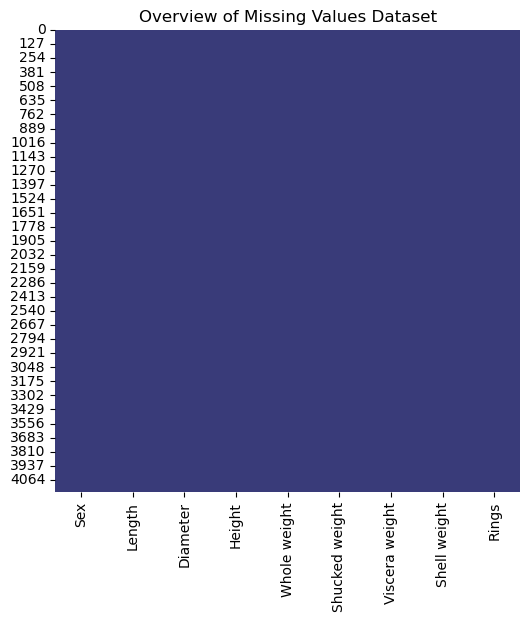

In [4]:
#check for missing values
abalone.isnull().sum()

#heatmap for missing values
plt.figure(figsize=(6,6))
sns.heatmap(abalone.isnull(), cmap="tab20b", cbar=False).set_title('Overview of Missing Values Dataset')
plt.show()

In [5]:
duplicate_rows = abalone.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

# Display the duplicate rows
duplicate_rows_abalone = abalone[duplicate_rows]
print("Duplicate Rows:")
print(duplicate_rows_abalone)

# Display the number of duplicate rows
print(f"Number of Duplicate Rows: {num_duplicate_rows}")

Duplicate Rows:
Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Whole weight, Shucked weight, Viscera weight, Shell weight, Rings]
Index: []
Number of Duplicate Rows: 0


In [6]:
rows = [1257, 2051, 3996]
abalone.loc[rows, 'Height'] = abalone['Height'].median()

# Verify the changes
for row in rows:
    print(abalone.iloc[row])
    print("\n")


Sex                    I
Length              0.43
Diameter            0.34
Height              0.14
Whole weight       0.428
Shucked weight    0.2065
Viscera weight     0.086
Shell weight       0.115
Rings                  8
Name: 1257, dtype: object


Sex                    F
Length             0.455
Diameter           0.355
Height              0.14
Whole weight       0.594
Shucked weight     0.332
Viscera weight     0.116
Shell weight      0.1335
Rings                  8
Name: 2051, dtype: object


Sex                    I
Length             0.315
Diameter            0.23
Height              0.14
Whole weight       0.134
Shucked weight    0.0575
Viscera weight    0.0285
Shell weight      0.3505
Rings                  6
Name: 3996, dtype: object




In [7]:
sex_mapping = {'M': 0, 'F': 1, 'I': 2}
abalone['Sex'] = abalone['Sex'].map(sex_mapping)
abalone['Sex']




0       0
1       0
2       1
3       0
4       2
       ..
4172    1
4173    0
4174    0
4175    1
4176    0
Name: Sex, Length: 4177, dtype: int64

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

import numpy as np

X_abalone = abalone.drop('Rings', axis=1)
y_abalone = abalone['Rings']

sizeArr = [0.3, 0.2, 0.1]

for size in sizeArr:
    X_train, X_test, y_train, y_test = train_test_split(X_abalone, y_abalone, test_size= size, random_state=1)
    rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
    rf.fit(X_train,y_train)
    y_rf = rf.predict(X_test)
    mse = mean_squared_error(y_test, y_rf)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_rf)
    r2 = r2_score(y_test, y_rf)
    
    


Scores with test size of 0.3
Root Mean Squared Error (RMSE): 2.148
Mean Absolute Error (MAE): 1.527
R-squared (R2): 0.5412


Scores with test size of 0.2
Root Mean Squared Error (RMSE): 2.155
Mean Absolute Error (MAE): 1.522
R-squared (R2): 0.5259


Scores with test size of 0.1
Root Mean Squared Error (RMSE): 2.075
Mean Absolute Error (MAE): 1.511
R-squared (R2): 0.5598




In [9]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X_abalone, y_abalone, test_size= 0.1, random_state=1)
print("Number of rows and column for X_train is:", X_train.shape)
print("Number of rows and column for X_test is:", X_test.shape)
print("Column in X_train and X_test is: ", X_train.columns.to_list())


Number of rows and column for X_train is: (3759, 8)
Number of rows and column for X_test is: (418, 8)
Column in X_train and X_test is:  ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']


# Modelling Section 

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error
import numpy as np
import time

# 1) Multi-layer Perceptron Regressor (MLPRegressor)

In [15]:
from sklearn.neural_network import MLPRegressor

param_grid = {
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01, 0.1],
}

start_time = time.time()

mlp_regressor = MLPRegressor(hidden_layer_sizes=(15, ), max_iter = 150, random_state=42)
grid_search = GridSearchCV(estimator=mlp_regressor, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

end_time = time.time()
training_timeMLP = end_time - start_time
print(f"Training Time: {training_timeMLP:.4g} seconds")

best_MLP_params = grid_search.best_params_
print("Best Hyperparameters:", best_MLP_params)
best_MLP = grid_search.best_estimator_
y_MLP = best_MLP.predict(X_test)

mseMLP = mean_squared_error(y_test, y_MLP)
rmseMLP = np.sqrt(mseMLP)
maeMLP = mean_absolute_error(y_test, y_MLP)
r2MLP = r2_score(y_test, y_MLP)
medaeMLP = median_absolute_error(y_test, y_MLP)

print(f"Mean Squared Error (MSE): {mseMLP:.4g}")
print(f"Root Mean Squared Error (RMSE): {rmseMLP:.4g}")
print(f"Mean Absolute Error (MAE): {maeMLP:.4g}")
print(f"R-squared (R2): {r2MLP:.4g}")
print(f"Median Absolute Error (MedAE): {medaeMLP:.4g}")


Training Time: 5.273 seconds
Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'learning_rate_init': 0.001, 'solver': 'lbfgs'}
Mean Squared Error (MSE): 3.789
Root Mean Squared Error (RMSE): 1.947
Mean Absolute Error (MAE): 1.431
R-squared (R2): 0.6128
Median Absolute Error (MedAE): 1.124


C:\Users\yeoh9\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


# 2) Gradient Boosting Regression

In [16]:
from sklearn.ensemble import GradientBoostingRegressor
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']  
}
start_time = time.time()

gbr = GradientBoostingRegressor(n_estimators = 50, random_state=42)
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

end_time = time.time()
training_timeGBR = end_time - start_time
print(f"Training Time: {training_timeGBR:.4g} seconds")

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_GBR = grid_search.best_estimator_
y_GBR = best_GBR.predict(X_test)

mseGBR = mean_squared_error(y_test, y_GBR)
rmseGBR = np.sqrt(mseGBR)
maeGBR = mean_absolute_error(y_test, y_GBR)
r2GBR = r2_score(y_test, y_GBR)
medaeGBR = median_absolute_error(y_test, y_GBR)

print(f"Mean Squared Error (MSE): {mseGBR:.4g}")
print(f"Root Mean Squared Error (RMSE): {rmseGBR:.4g}")
print(f"Mean Absolute Error (MAE): {maeGBR:.4g}")
print(f"R-squared (R2): {r2GBR:.4g}")
print(f"Median Absolute Error (MedAE): {medaeGBR:.4g}")



Training Time: 9.671 seconds
Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10}
Mean Squared Error (MSE): 4.485
Root Mean Squared Error (RMSE): 2.118
Mean Absolute Error (MAE): 1.549
R-squared (R2): 0.5417
Median Absolute Error (MedAE): 1.17


# 3) KNN

In [13]:
from sklearn.neighbors import KNeighborsRegressor
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
start_time = time.time()

knn = KNeighborsRegressor()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

end_time = time.time()
training_timeKNN = end_time - start_time
print(f"Training Time: {training_timeKNN:.4g} seconds")

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_KNN = grid_search.best_estimator_
y_KNN = best_KNN.predict(X_test)

mseKNN = mean_squared_error(y_test, y_KNN)
rmseKNN = np.sqrt(mseKNN)
maeKNN = mean_absolute_error(y_test, y_KNN)
r2KNN = r2_score(y_test, y_KNN)
medaeKNN = median_absolute_error(y_test, y_KNN)

print(f"Mean Squared Error (MSE): {mseKNN:.4g}")
print(f"Root Mean Squared Error (RMSE): {rmseKNN:.4g}")
print(f"Mean Absolute Error (MAE): {maeKNN:.4g}")
print(f"R-squared (R2): {r2KNN:.4g}")
print(f"Median Absolute Error (MedAE): {medaeKNN:.4g}")



Training Time: 0.3563 seconds
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
Mean Squared Error (MSE): 4.639
Root Mean Squared Error (RMSE): 2.154
Mean Absolute Error (MAE): 1.531
R-squared (R2): 0.5259
Median Absolute Error (MedAE): 1.125


# 4)Ridge Regression

In [14]:
from sklearn.linear_model import Ridge

param_grid = {'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]}

start_time = time.time()

ridge = Ridge()
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

end_time = time.time()
training_timeRidge = end_time - start_time
print(f"Training Time: {training_timeRidge:.4g} seconds")

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_ridge = grid_search.best_estimator_
y_Ridge = best_ridge.predict(X_test)

mseRidge = mean_squared_error(y_test, y_Ridge)
rmseRidge = np.sqrt(mseRidge)
maeRidge = mean_absolute_error(y_test, y_Ridge)
r2Ridge = r2_score(y_test, y_Ridge)
medaeRidge = median_absolute_error(y_test, y_Ridge)

print(f"Mean Squared Error (MSE): {mseRidge:.4g}")
print(f"Root Mean Squared Error (RMSE): {rmseRidge:.4g}")
print(f"Mean Absolute Error (MAE): {maeRidge:.4g}")
print(f"R-squared (R2): {r2Ridge:.4g}")
print(f"Median Absolute Error (MedAE): {medaeRidge:.4g}")



Training Time: 0.07895 seconds
Best Hyperparameters: {'alpha': 0.01}
Mean Squared Error (MSE): 4.468
Root Mean Squared Error (RMSE): 2.114
Mean Absolute Error (MAE): 1.556
R-squared (R2): 0.5434
Median Absolute Error (MedAE): 1.11


# Evaluation


In [18]:
import matplotlib.colors as mcolors

model = ['MLPRegressor', 'GBR', 'KNN', 'Ridge Regression']
colors = list(mcolors.TABLEAU_COLORS.values())
if len(model) > len(colors):
    colors = colors * (num_models // len(colors) + 1)
colors = colors[:len(model)]
timeList = [training_timeMLP, training_timeGBR, training_timeKNN, training_timeRidge]
mseList = [mseMLP, mseGBR, mseKNN, mseRidge]
rmseList = [rmseMLP, rmseGBR, rmseKNN, rmseRidge]
maeList = [maeMLP, maeGBR, maeKNN, maeRidge]
r2List = [r2MLP, r2GBR, r2KNN, r2Ridge]
medaeList = [medaeMLP, medaeGBR, medaeKNN, medaeRidge]

# 1) Training Time

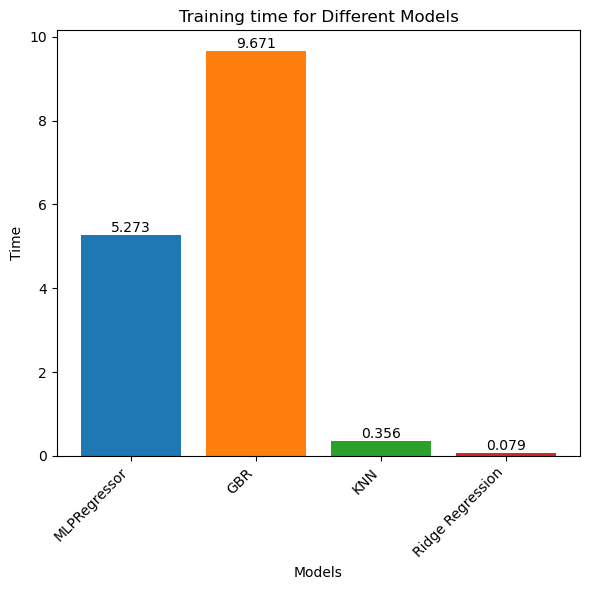

In [19]:
plt.figure(figsize=(6, 6))
bars = plt.bar(model, timeList, color=colors)
plt.xlabel('Models')
plt.ylabel('Time')
plt.title('Training time for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 3), ha='center', va='bottom')
    
plt.show()


# 2) MSE

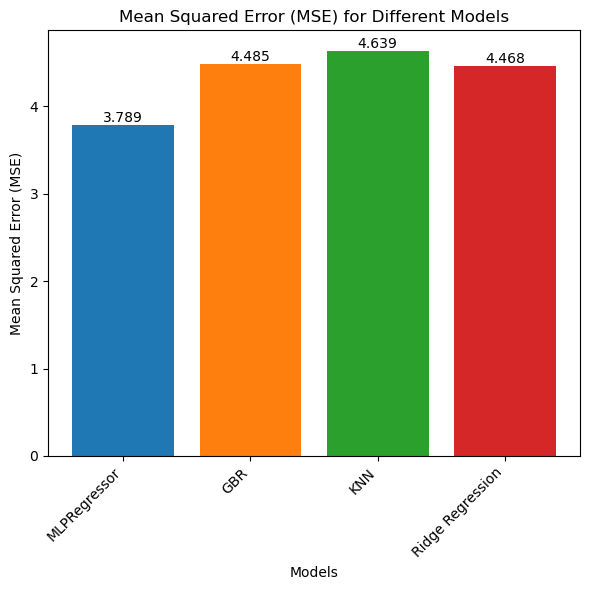

In [20]:
plt.figure(figsize=(6, 6))
bars = plt.bar(model, mseList, color=colors)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 3), ha='center', va='bottom')
plt.show()

# 3) RMSE

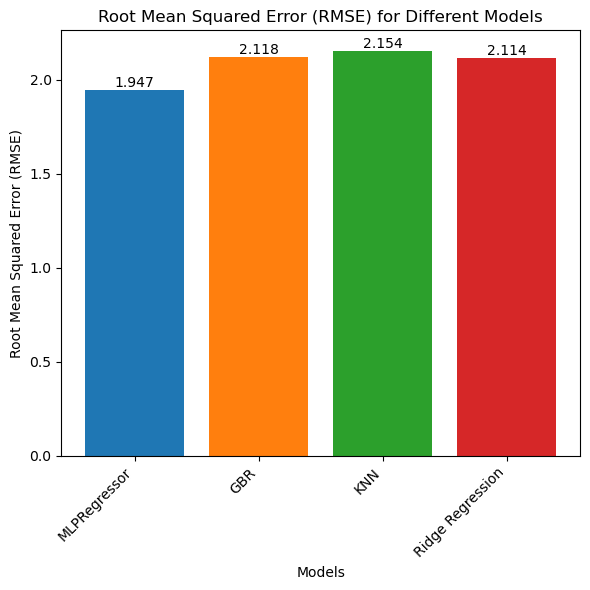

In [21]:
plt.figure(figsize=(6, 6))
bars = plt.bar(model, rmseList, color=colors)
plt.xlabel('Models')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Root Mean Squared Error (RMSE) for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 3), ha='center', va='bottom')
plt.show()

# 4) MAE

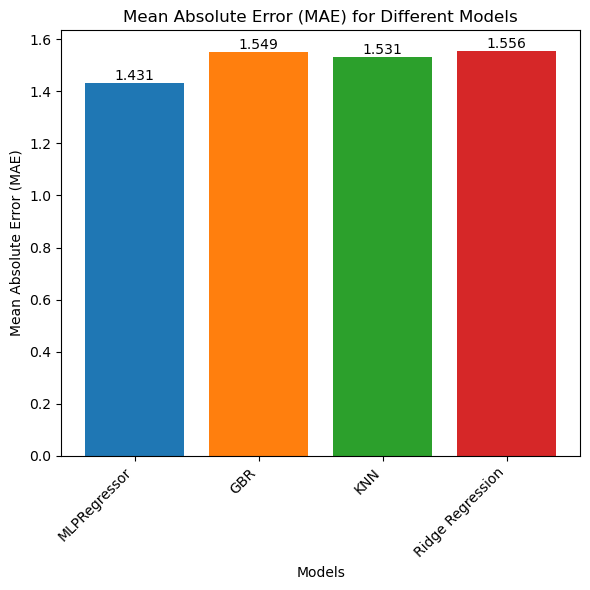

In [23]:
plt.figure(figsize=(6, 6))
bars = plt.bar(model, maeList, color=colors)
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Mean Absolute Error (MAE) for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 3), ha='center', va='bottom')
plt.show()

# 5) R2

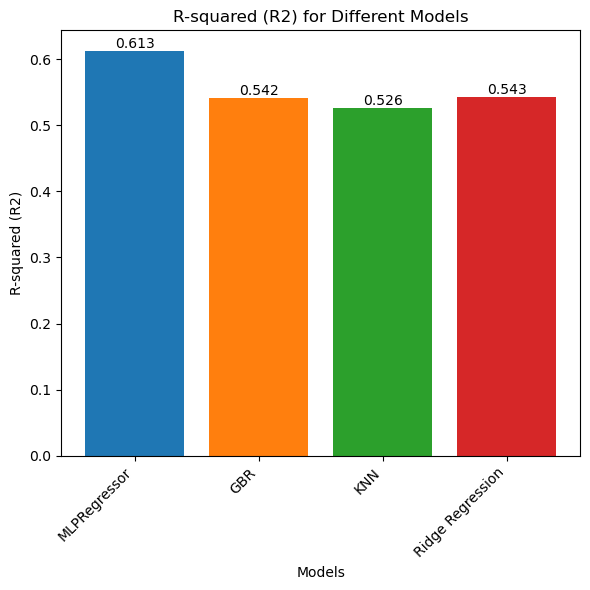

In [24]:
plt.figure(figsize=(6, 6))
bars = plt.bar(model, r2List, color=colors)
plt.xlabel('Models')
plt.ylabel('R-squared (R2)')
plt.title('R-squared (R2) for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 3), ha='center', va='bottom')
plt.show()

# 6) MEDAE

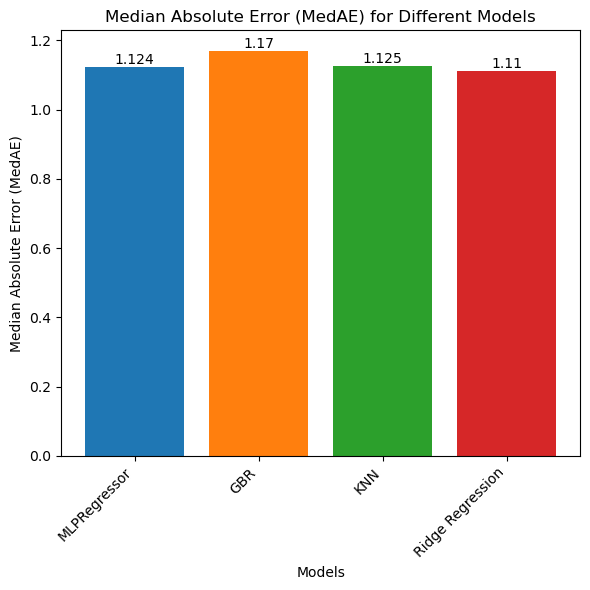

In [25]:
plt.figure(figsize=(6, 6))
bars = plt.bar(model, medaeList, color=colors)
plt.xlabel('Models')
plt.ylabel('Median Absolute Error (MedAE)')
plt.title('Median Absolute Error (MedAE) for Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 3), ha='center', va='bottom')
plt.show()

# Deployment

In [18]:
import joblib

joblib.dump(best_MLP, 'mlpRegressor.pkl')


['mlpRegressor.pkl']